In [1]:
import uproot
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

import awkward as ak
import coffea.processor as processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import hist

# this avoids some warnings due to using older NanoAOD ntuples
NanoAODSchema.warn_missing_crossrefs = False

In [74]:
def add_uncertainty(hist, ax, newaxis, ratio=False):
    opts = {'step': 'post', 'label': 'Uncertainty', 'hatch': '///',
                    'facecolor': 'none', 'edgecolor': (0, 0, 0, .5), 'linewidth': 0, 'zorder':10.}
    
    if ratio:
        down = np.ones(len(hist.counts())) - hist.errors()/hist.counts()
        up = np.ones(len(hist.counts())) + hist.errors()/hist.counts()
    else:
        down = hist.counts()-hist.errors()
        up = hist.counts()+hist.errors()
    up = np.nan_to_num(up)
    down = np.nan_to_num(down)
    ax.fill_between(x=newaxis, y1=np.r_[down, down[-1]], y2=np.r_[up, up[-1]], **opts)

In [5]:
    #ax.fill_between(x=hist.axes[0].edges(), y1=np.r_[down, down[-1]], y2=np.r_[up, up[-1]], **opts)

In [6]:
fitDiagnostics = uproot.open('Fitting/unblinded/fitDiagnostics.root')

In [7]:
r = fitDiagnostics.keys();


In [88]:
#fitDiagnostics['shapes_fit_s'].keys();
shapetype = 'shapes_prefit'
fitDiagnostics[shapetype].keys();

In [89]:
dc_sr = fitDiagnostics[shapetype+'/dc_sr']

In [34]:
processes = [
    'ttgamma',
    'NonPrompt',
    'MisID',
    'WG',
    'ZG',
    'other',
]

processes.reverse()

colors = {
    'ttgamma': '',  # FIXME
    
}

labels = {
    'ttgamma': r'$t\bar{t}\gamma$',
    'NonPrompt': r'nonprompt $\gamma$',
    'MisID': r'MisID $\gamma$',
    'WG': r'$W\gamma$',
    'ZG': r'$Z\gamma$',
    'other': r'other',
}

In [35]:
groupingCategory = {
    "NonPrompt": [3j,4j],
    "MisID": [2j],
    "Prompt": [1j],
}

groupingFineCategory = {
    "Genuine Photon": [1j],
    "Misidentified Electron": [2j],
    "Hadronic Photon": [3j],
    "Hadronic Fake": [4j],
}

groupingMCDatasets = {
    "ZG": [
        "ZGamma_01J_5f_lowMass",
    ],
    "WG": [
        "WGamma",
    ],

    "other": [
        "TTbarPowheg_Dilepton",
        "TTbarPowheg_Semilept",
        "TTbarPowheg_Hadronic",
        "W2jets",
        "W3jets",
        "W4jets",
        "DYjetsM50",
        "ST_s_channel",
        "ST_tW_channel",
        "ST_tbarW_channel",
        "ST_tbar_channel",
        "ST_t_channel",
        "TTWtoLNu",
        "TTWtoQQ",
        "TTZtoLL",
        "GJets_HT200To400",
        "GJets_HT400To600",
        "GJets_HT600ToInf",
        "ZZ",
        "WZ",
        "WW",
        "TGJets"
    ],
    "ttgamma": [
        "TTGamma_Dilepton",
        "TTGamma_SingleLept",
        "TTGamma_Hadronic",
    ],
}

In [85]:
# axes hardcoded from save_to_root.py
newaxes = {'M3':np.linspace(50,550,11),
           'MisIDe': [ 40.,  60.,  80., 100., 120., 140., 160., 180., 200.,0,0],
           'MisIDmu': [ 40.,  60.,  80., 100., 120., 140., 160., 180., 200.,0,0],
           'chIso':[ 1.1563125, 2.51313,4.92525,8.9957025,14.9254975, 19.9507475,0,0,0,0,0]}
axeslabels = {'M3':r'$M_3$ [GeV]',
              'MisIDe': r'$m_{e\gamma}$ [GeV]',
              'MisIDmu': r'$m_{\mu\gamma}$ [GeV]',
              'chIso':'Charged Hadron Isolation [GeV]'}

/tmp/ipykernel_30243/3373465386.py:42: RuntimeWarning: invalid value encountered in divide
  ratio_val = dc_x['data'].values()[1]/dc_x['total'].counts()
/tmp/ipykernel_30243/3373465386.py:43: RuntimeWarning: invalid value encountered in divide
  ratio_err_hep = np.sqrt(dc_x['data'].values()[1])/dc_x['data'].values()[1]
/tmp/ipykernel_30243/1031876838.py:6: RuntimeWarning: invalid value encountered in divide
  down = np.ones(len(hist.counts())) - hist.errors()/hist.counts()
/tmp/ipykernel_30243/1031876838.py:7: RuntimeWarning: invalid value encountered in divide
  up = np.ones(len(hist.counts())) + hist.errors()/hist.counts()


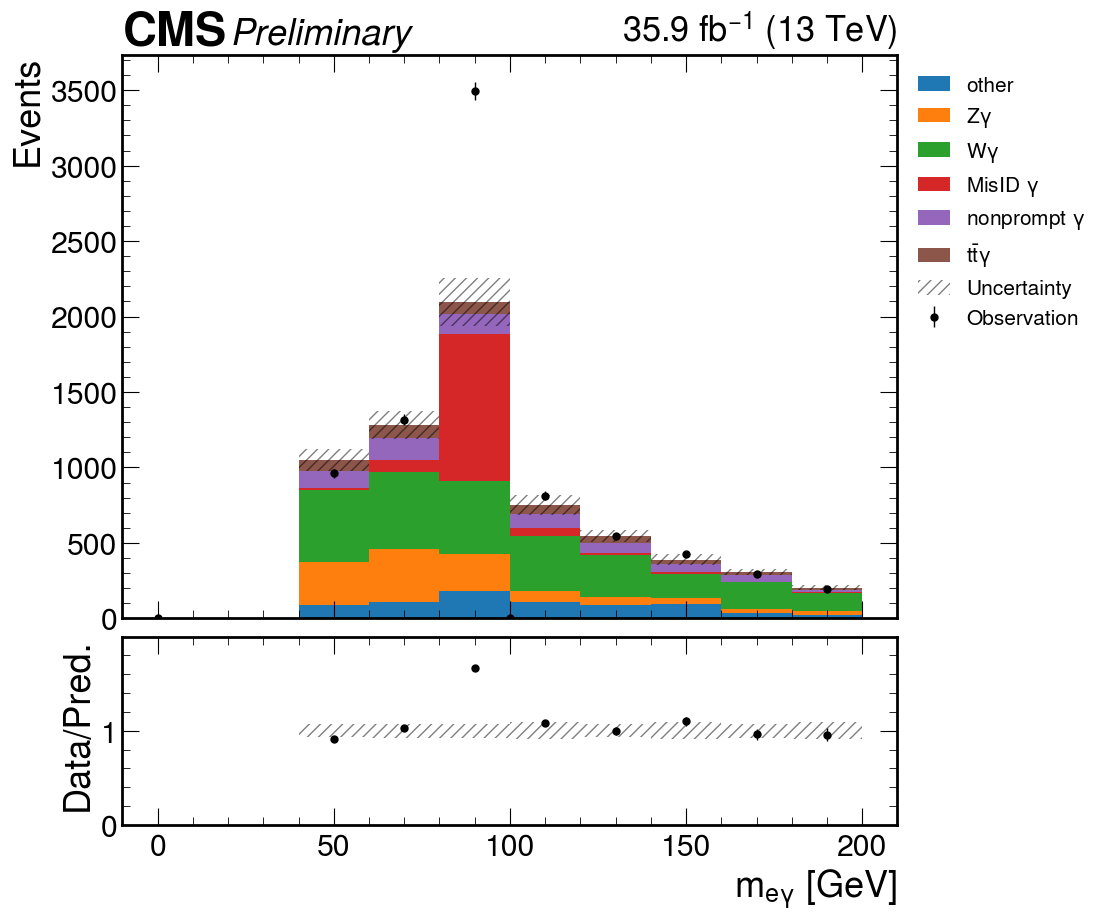

In [90]:
region = 'MisIDe'
dc_x = fitDiagnostics[shapetype+'/dc_egamma']
h = dc_x['data']

fig, (ax, rax) = plt.subplots(2,1,figsize=(10,10), gridspec_kw={"height_ratios": (3, 1), "hspace": 0.05}, sharex=True)
newaxis = newaxes[region]
xlabel = axeslabels[region]

hep.cms.label(
    "Preliminary",
    data=True,
    lumi=35.9,
    loc=0,
    ax=ax,
)

hep.histplot(
    [ dc_x[x].counts() for x in processes ],
    #dc_sr['total'].axes[0].edges(),
    newaxis,
    #w2=[ dc_sr[x].errors() for x in processes ],  # not needed
    histtype="fill",
    stack=True,
    label=[labels[x] for x in processes],
    #color=['red', 'green'],
    ax=ax
)

# this is for the data points
wq=hep.histplot(
    dc_x['data'].values()[1],
    #dc_sr['total'].axes[0].edges(),
    newaxis,
    w2=dc_x['data'].values()[1],
    histtype="errorbar",
    stack=False,
    label='Observation',
    color='black',
    ax=ax
)

ratio_val = dc_x['data'].values()[1]/dc_x['total'].counts()
ratio_err_hep = np.sqrt(dc_x['data'].values()[1])/dc_x['data'].values()[1]

# this is for the ratio plot
hep.histplot(
    ratio_val,
    #dc_sr['total'].axes[0].edges(),
    newaxis,
    yerr=ratio_err_hep,
    histtype="errorbar",
    color='black',
    ax=rax
)

rax.set_ylim(0,1.99)
rax.set_xlabel(xlabel)
rax.set_ylabel(r'Data/Pred.')
ax.set_ylabel(r'Events')

add_uncertainty(dc_x['total'], ax, newaxis)
add_uncertainty(dc_x['total'], rax, newaxis,ratio=True)

#ax.legend()
ax.legend(prop={'size': 15}, bbox_to_anchor=(1, 1))

In [38]:
wq

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

In [ ]:
rax